In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
import plotly
sns.set(color_codes=True)

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("avocado.csv")

# Number of rows and columns
print(df.shape)

#4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
# Dropping the irrelevant columns
df = df.drop(['4046', 
              '4225', 
              '4770', 
              'Total Bags',
              'Small Bags',
              'Large Bags',
              'XLarge Bags'], axis=1)

df['Date']= pd.to_datetime(df['Date'])

df = df.drop(df[(df.Date.dt.year != 2016) & (df.Date.dt.month != 1)].index)
df = df.drop(df[(df.type=="conventional")].index)
df = df[(df.region=="Atlanta")]



df.head(5)


# Remove duplicates
df = df.drop_duplicates()
df.head(5)

# Remove missing values
df = df.dropna()
df

(18249, 14)


,Unnamed: 0,Date,AveragePrice,Total Volume,type,year,region
9226,48,2015-01-25,1.87,3047.38,organic,2015,Atlanta
9227,49,2015-01-18,1.86,4294.01,organic,2015,Atlanta
9228,50,2015-01-11,1.84,3743.82,organic,2015,Atlanta
9229,51,2015-01-04,1.76,3846.69,organic,2015,Atlanta
11985,0,2016-12-25,1.76,5456.42,organic,2016,Atlanta
...,...,...,...,...,...,...,...
14846,52,2017-01-01,1.81,5342.85,organic,2017,Atlanta
17621,8,2018-01-28,1.67,14446.26,organic,2018,Atlanta
17622,9,2018-01-21,1.64,18554.97,organic,2018,Atlanta
17623,10,2018-01-14,1.56,16151.70,organic,2018,Atlanta


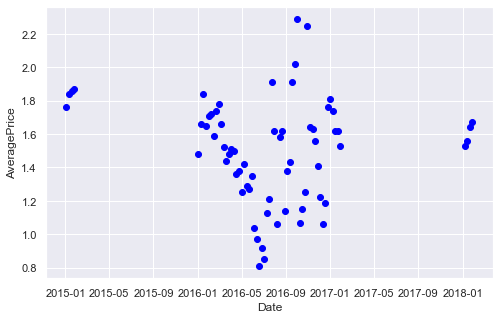

In [2]:
fig, ax = plt.subplots(figsize=(8,5))
plt.ticklabel_format(style='plain')
ax.scatter(df['Date'], 
           df['AveragePrice'], 
           color="blue", 
           alpha=1.0)
ax.set_xlabel('Date')
ax.set_ylabel('AveragePrice')
plt.show()